In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

(-0.06575, 1.05075, -0.05017677669529663, 1.0537123106012292)

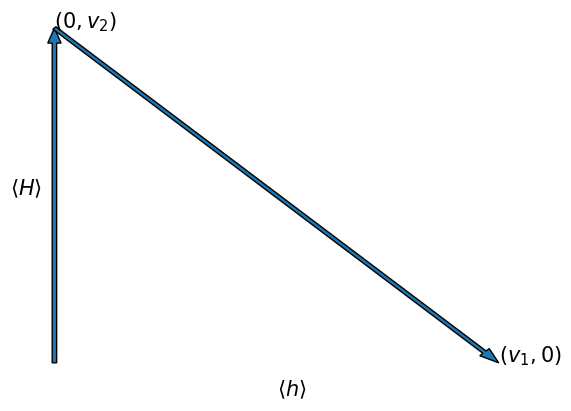

In [2]:
# Two-step phase transition plot shown in Section 5.4

ax = plt.subplot()

ax.arrow(0, 0, 0, 1, length_includes_head=True, width=0.01)
ax.arrow(0, 1, 1, -1, length_includes_head=True, width=0.01,)
#plt.xlim(-0.01,1.0)
#plt.ylim(-0.01,0.01)
plt.xlabel("$h$ in $v_1$", size = 15)
plt.ylabel("$H$ in $v_2$", size = 15)
tex1 = r'$(0,v_2)$'
tex2 = r'$(v_1,0)$'
tex3 = r'$\left\langle H\right\rangle}$'
tex4 = r'$\left\langle h\right\rangle}$'
ax.text(0, 1, tex1, size = 15)
ax.text(1, 0, tex2, size = 15)
plt.text(-0.1, 0.5, tex3, size = 15)
plt.text(0.5, -0.1, tex4, size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)

ax.spines[['right', 'top']].set_visible(False)

ax.axis("off")
#plt.savefig("two_step_transition.png")

Correction of Boltzmann suppression: 1.0575346125361681e-26


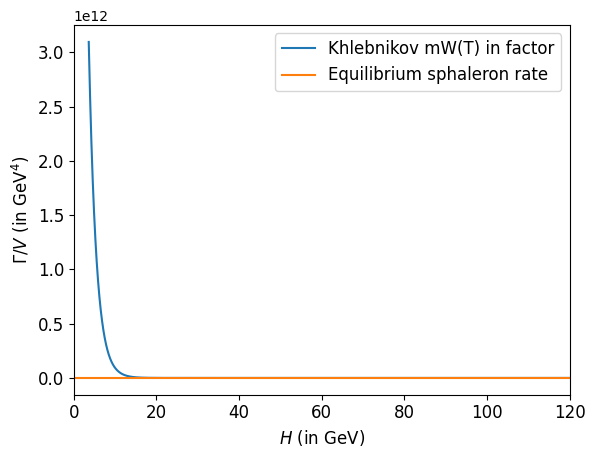

In [6]:
# Khlebnikov Sphaleron rate

c    = 1
aw   = 1/30
g    = 0.647209
TN   = 70.4
vN   = 116



def W_mass(x,T):
    return g*np.sqrt(x**2/4 +2*T**2) # Thermal correction: +2*T**2

def rate(x, y, T):
    G = 64*x**7/(aw**3*T**3)*np.exp(-4*y/(aw*T))
    return G

phi  = np.linspace(1*aw*TN/(g), 120, 100000)
#z    = Lw*np.arctanh(2*phi/vb-1)
y    = np.linspace(-1e39, 1e39, 100000)
gam  = rate(W_mass(phi, TN), W_mass(phi, 0), TN)
spl  = rate_split(phi, TN)
plt.plot(phi, gam, label="Khlebnikov mW(T) in factor") # Left plot of Figure 6.1
#plt.plot(phi, rate(W_mass(phi, TN),W_mass(phi,TN)), label = "Khlebnikov mW(T) everywhere") # Right plot of Figure 6.1
plt.plot(np.linspace(0,120,100),25.4*aw**5*TN**5*np.ones(100), label = "Equilibrium sphaleron rate") # equilibrium sphaleron rate
#plt.plot(np.ones(100)*aw*TN/(g), np.linspace(0,1e13,100))  # H_sphaleron, value above which sphalerons are suppressed
plt.ylabel("$\Gamma/V$ (in GeV$^4$)", size = "12")
plt.xlabel("$H$ (in GeV)", size = "12")
plt.xlim(0,120)
#plt.ylim(-100,2000) # ylim for left plot of Figure 6.1
#plt.ylim(-1e-35,5e-35) # ylim for right plot of Figure 6.1
plt.legend()
plt.tick_params(labelsize=12)                    # Set tick font size
plt.legend(fontsize=12)                          # Set legend font size


#plt.savefig("sphaleron_rate_factor.png")


# Step function vs. Boltzmann suppression of thermal sphaleron rate, used for Section 6.2

Step_Solution = (aw*TN/(2*g))**2
Correction    = aw*TN/(2*g)*np.exp(-2*g*vN/(aw*TN))*(vN+aw*TN/(2*g))

print("Correction of Boltzmann suppression: " + str(Correction/Step_Solution))

There is a solution of the change of the Higgs field called the kink solution
\begin{equation}
    \phi(z)=\frac{\phi(z\rightarrow\infty)}{2}\left(1+\tanh\left(\frac{z}{L_w}\right)\right)
\end{equation}
where $\phi(z\rightarrow\infty)\sim116$ GeV and $L_w=(\alpha_WT)^{-1}$. The equilibrium expression of the baryon number show an extra term
\begin{equation}
    n_B^0=\frac{T^2}{12M^2}(v_w\partial_z\phi+D\partial_z^2\phi)
\end{equation}
where $D$ is the diffusion coefficient. Using these two to solve the transport equation one obtaines an expression of the final baryon number density
\begin{equation*}
    n_B=\frac{3\kappa\alpha_W^4T^3\phi^2(z\rightarrow \infty)}{8M^2}\left(1+\tanh\left(\frac{z}{L_w}\right)\right)^2\left.\left[1+\frac{2D}{L_wv_w}\left(1-\tanh^2\left.\left(\frac{z}{L_w}\right)\right)\right/\left(1+\tanh\left(\frac{z}{L_w}\right)\right)\right]\right|_{z_\mathrm{sph}}
\end{equation*}
where $z_\mathrm{sph}$ is the $z$ value above which the sphalerons are not effective anymore. This is
\begin{equation}
    z_\mathrm{sph}\sim \mathrm{arctanh}\left(\frac{2\phi_\mathrm{sph}}{\phi(z\rightarrow \infty)}-1\right)L_w\sim-1.7L_w
\end{equation}
where $\phi_\mathrm{sph}$ is defined as $g\phi_\mathrm{sph}\sim\alpha_WT$ and $T=T_c=70.4$GeV is chosen.

In [10]:
# How does the diffusion term contribute, used for Section 6.3

vb  = 116 
Lw = 1/(aw*TN)
D  = 6/TN
def Lw(T):
    return 1/(aw*T)
def vsph(T):
    return np.sqrt(aw/(4*np.pi))*T #value of Higgs above which sphalerons stop being efficient at Tc
def zsph(T):
    return np.arctanh(2*vsph(T)/vb-1)*Lw(T) #the corresponding z value

C = (1-np.tanh(zsph(TN)/Lw(TN))**2)/((1+np.tanh(zsph(TN)/Lw(TN)))*Lw(TN))
print("Coefficient proportional to D/vw: " + str(C))
print("Coefficient proportional to 1/vw: " + str(D*C))

Coefficient proportional to D/vw: 4.54663319930274
Coefficient proportional to 1/vw: 0.3874971476678471


mu^2 = -7812.5
mu2^2 = 3023.845066459995
lambda1 = 0.12886749199352251
lambda2 = 0.4
lambda3 = 7.218794998129496
lambda4 = -3.607547499064748
lambda5 = -3.607547499064748


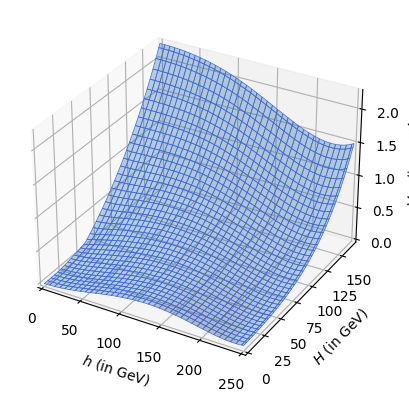

In [17]:
# Effective potential dependent on h and H, used to make 2D-plots in Figure 7.3

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.special import kn

v0   = 246.22
g    = 0.65
gY   = 0.35
mt   = 172.76
mh   = 125
mIR  = 1 * mh
eps  = 10**(-10)
mH   = 56
mHpm = 471
mA   = 471

yt   = np.sqrt(2.0) * mt / v0
lam2 = 0.4
#\lambda_L in WallGo Inert Doublet Model is \lambda345 / 2
l345 = 0.0037
lam  = 0.5 * mh**2 / v0**2
lam5 = (mH**2 - mA**2) / v0**2
lam4 = (mA**2 + mH**2 - 2 * mHpm**2) / v0**2
lam3 = l345 + 2 * (mHpm**2 - mH**2) / v0**2
msq = -lam*v0**2
msq2 = mHpm**2 - lam3 * v0**2 / 2

print("mu^2 = "+ str(msq))
print("mu2^2 = "+ str(msq2))
print("lambda1 = "+ str(lam))
print("lambda2 = "+ str(lam2))      
print("lambda3 = "+ str(lam3))
print("lambda4 = "+ str(lam4))
print("lambda5 = "+ str(lam5))


def Jb(r):
    if isinstance(r, np.ndarray):
        J = np.zeros(len(r))
        for i in range(len(r)):
            if r[i] == 0:
                J[i] = -np.pi**4 / 45
            else:    
                for n in [1,2,3,4,5]:
                    J[i] += -(r[i]/n**2) * kn(2, np.sqrt(r[i]) * n)
    else:
        if r == 0:
            J = -np.pi**4 / 45
        else:
            J=0
            for n in [1,2,3,4,5]:
                J += -(r/n**2) * kn(2, np.sqrt(r) * n)
    return J

def Jf(r):
    if isinstance(r, np.ndarray):
        J = np.zeros(len(r))
        for i in range(len(r)):
            if r[i] == 0:
                J[i] = -7 * np.pi**4 / (8 * 45)
            else:    
                for n in [1,2,3,4,5]:
                    J[i] += (-1)**n * (r[i]/n**2) * kn(2, np.sqrt(r[i]) * n)
    else:
        if r == 0:
            J = -7 * np.pi**4 / (8 * 45)
        else:
            J=0
            for n in [1,2,3,4,5]:
                J += (-1)**n * (r/n**2) * kn(2, np.sqrt(r) * n)
    return J



g2 = g
g1 = gY

# Scalar masses
# Scalar masses, just diagonalizing manually. matrix (A C // C B)
def Potential(v, u, T):
    eps = 1e-10
    Q = v0
    V0 = msq * v**2 / 2 + msq2 * u**2 / 2 + lam * v**4 / 4 + lam2 * u**4 / 4 + (lam3 + lam4 + lam5) * v**2 * u**2 / 4
    
    massS00 = (-lam * v0**2 + 3 * lam * v**2 + (lam3 + lam4 + lam5) / 2 * u**2)
    massS11 = (msq2 + (lam3 + lam4 + lam5) / 2 * v**2 + 3 * lam2 * u**2)
    massS01 = (lam3 + lam4 + lam5) * v * u
    DeterminantS = (massS00 - massS11) ** 2 + 4 * massS01**2

    msqS1 = 0.5 * (massS00 + massS11 + 1 * np.sqrt(DeterminantS))
    msqS2 = 0.5 * (massS00 + massS11 - 1 * np.sqrt(DeterminantS))  #np.sign(massS00 - massS11) for sign swap

    #print("massS00 = " + str(massS00))
    #print("massS11 = "+ str(massS11))
    #print("massS00-massS11 = " + str(massS00-massS11))
    #print("mS1 = " + str(msqS1))
    #print("mS2 = " + str(msqS2))

# Pseudoscalar masses
    massP00 = (-lam * v0**2 + lam * v**2 + (lam3 + lam4 - lam5) / 2 * u**2)
    massP11 = (msq2 + (lam3 + lam4 - lam5) / 2 * v**2 + lam2 * u**2)
    massP01 = (lam5) * v * u
    DeterminantP = (massP00 - massP11) ** 2 + 4 * massP01**2

    msqP1 = 0.5 * (massP00 + massP11 - 1 * np.sqrt(DeterminantP)) + eps
    msqP2 = 0.5 * (massP00 + massP11 + 1 * np.sqrt(DeterminantP)) #np.sign(massP00 - massP11) for sign swap

    
    #print("massP00 = " + str(massP00))
    #print("massP11 = "+ str(massP11))
    #print("massP00-massP11 = " + str(massP00-massP11))
    #print("mP1 = " + str(msqP1))
    #print("mP2 = " + str(msqP2))

# Charged scalars
    masspm00 = (-lam * v0**2 + lam * v**2 + lam3 / 2 * u**2)
    masspm11 = (msq2 + lam3 / 2 * v**2 + lam2 * u**2)
    masspm01 = (lam4 + lam5) * v * u / 2
    Determinantpm = (masspm00 - masspm11) ** 2 + 4 * masspm01**2

    msqpm1 = 0.5 * (masspm00 + masspm11 - 1 * np.sqrt(Determinantpm)) + eps
    msqpm2 = 0.5 * (masspm00 + masspm11 + 1 * np.sqrt(Determinantpm))  #np.sign(masspm00 - masspm11) for sign swap

    
    #print("masspm00 = " + str(masspm00))
    #print("masspm11 = "+ str(masspm11))
    #print("masspm00-masspm11 = " + str(masspm00-masspm11))
    #print("mpm1 = " + str(msqpm1))
    #print("mpm2 = " + str(msqpm2))

# Scalar masses at the zero-temperature vev (for RG-scale)
    mS1sq0T  = mh**2
    mS2sq0T  = mH**2
    mP1sq0T  = mIR**2
    mP2sq0T  = mA**2
    mpm1sq0T = mIR**2
    mpm2sq0T = mHpm**2
    
    #print(massS00 - massS11, msqS1 - msqS2) # massP00 - massP11, masspm00 - masspm11)
    #print(mS1sq0T, mS2sq0T, mP1sq0T, mP2sq0T, mpm1sq0T, mpm2sq0T)
    #print(msqS1, msqS2, msqP1, msqP2, msqpm1, msqpm2)

# Gauge boson masses
    mWsq = g2**2 * (v**2 + u**2) / 4.0 + eps
    mZsq = (g1**2 + g2**2) * (v**2 + u**2) / 4.0 + eps

# Gauge boson masses at the zero temperature vev (for RG-scale)
    mWsq0T = g2**2 * v0**2 / 4.0
    mZsq0T = (g1**2 + g2**2) * v0**2 / 4.0

    # fermion masses
    msqt   = v**2 * yt**2 / 2 + eps
    msqt0T = v0**2 * yt**2 / 2

    VCW = 1 / (64 * np.pi**2) * (6 * (mWsq**2 * (np.log(np.abs(mWsq/mWsq0T)) - 3/2) + 2 * mWsq0T *mWsq)
        + 3 * (mZsq**2 * (np.log(np.abs(mZsq/mZsq0T)) - 3/2) + 2 * mZsq0T * mZsq)
        + (msqS1**2 * (np.log(np.abs(msqS1/mS1sq0T)) - 3/2) + 2 * mS1sq0T * msqS1)
        + (msqS2**2 * (np.log(np.abs(msqS2/mS2sq0T)) - 3/2) + 2 * mS2sq0T * msqS2)
        + (msqP1**2 * (np.log(np.abs(msqP1/mP1sq0T)) - 3/2))
        + (msqP2**2 * (np.log(np.abs(msqP2/mP2sq0T)) - 3/2) + 2 * mP2sq0T * msqP2)
        + 2 * (msqpm1**2 * (np.log(np.abs(msqpm1/mpm1sq0T)) - 3/2))
        + 2 * (msqpm2**2 * (np.log(np.abs(msqpm2/mpm2sq0T)) - 3/2) + 2 * mpm2sq0T * msqpm2)
        - 12 * (msqt**2 * (np.log(np.abs(msqt/msqt0T)) - 3/2) + 2 * msqt0T * msqt))

    VCT = -1 / (64 * np.pi**2) * (2 * (mWsq**2 * (np.log(mWsq0T/Q**2)) - 2 * mWsq0T * mWsq)           # Longitudinal C_i = 3/2
                                  + 4 * (mWsq**2 * (np.log(mWsq0T/Q**2) + 1) - 2 * mWsq0T * mWsq) # Transverse C_i = 5/6
                                  + 2 * (mZsq**2 * (np.log(mZsq0T/Q**2) + 1) - 2 * mZsq0T * mZsq) # Transverse C_i = 5/6
                                  + 1 * (mZsq**2 * (np.log(mZsq0T/Q**2)) - 2 * mZsq0T * mZsq)         # Longitudinal C_i = 3/2
                                  + msqS1 **2 * np.log(mS1sq0T/Q**2) - 2 * mS1sq0T * msqS1
                                  + msqS2 **2 * np.log(mS2sq0T/Q**2) - 2 * mS2sq0T * msqS2
                                  + msqP2 **2 * np.log(mP2sq0T/Q**2) - 2 * mP2sq0T * msqP2
                                  + 2 * (msqpm2 **2 * np.log(mpm2sq0T/Q**2) - 2 * mpm2sq0T * msqpm2)
                                  + msqP1**2 * np.log(mIR**2/Q**2) + 2 * msqpm1**2 * np.log(mIR**2/Q**2)
                                  - 12 * (msqt**2 * np.log(msqt0T/Q**2) - 2 * msqt0T * msqt)
                                 )

    piPhi = T**2/24 * (6 * yt**2 + 9/2 * g**2 + 3/2 * gY**2 + 12 * lam + 4 * lam3 + 2 * lam4)
    piEta = T**2/24 * (9/2 * g**2 + 3/2 * gY**2 + 12 * lam2 + 4 * lam3 + 2 * lam4)

    massS00T = (massS00 + piPhi)
    massS11T = (massS11 + piEta)
    massS01T = massS01
    DeterminantST = (massS00T - massS11T) ** 2 + 4 * massS01T**2

    msqS1T = (0.5 * (massS00T + massS11T + np.sqrt(DeterminantST)))
    msqS2T = 0.5 * (massS00T + massS11T - np.sqrt(DeterminantST))

    # Pseudoscalar masses
    massP00T = (massP00 + piPhi)
    massP11T = (massP11 + piEta)
    massP01T = massP01
    DeterminantPT = (massP00T - massP11T) ** 2 + 4 * massP01T**2

    msqP1T = (0.5 * (massP00T + massP11T - np.sqrt(DeterminantPT)))
    msqP2T = 0.5 * (massP00T + massP11T + np.sqrt(DeterminantPT))

    # Charged scalars
    masspm00T = (masspm00 + piPhi)
    masspm11T = (masspm11 + piEta)
    masspm01T = masspm01
    DeterminantpmT = (masspm00T - masspm11T) ** 2 + 4 * masspm01T**2

    msqpm1T = (0.5 * (masspm00T + masspm11T - np.sqrt(DeterminantpmT)))
    msqpm2T = 0.5 * (masspm00T + masspm11T + np.sqrt(DeterminantpmT))
        
    # Gauge boson masses, with thermal contribution to longitudinal W mass
    mWsqT = g2**2 * (v**2 + u**2) / 4.0 + eps
    mWsqL = g2**2 * (v**2 + u**2) / 4.0 + 2 * g2**2 * T**2 + eps
    mZsqT = (g1**2 + g2**2) * (v**2 + u**2) / 4.0 + eps

    # Eigenvalues of the Z&B-boson mass matrix
    piB = 2 * g1**2 * T**2
    piW = 2 * g2**2 * T**2
    m1sq = g1**2 * (v**2 + u**2) / 4
    m2sq = g2**2 * (v**2 + u**2) / 4
    m12sq = -g1 * g2 * (v**2 + u**2) / 4

    msqEig1 = (
            m1sq
            + m2sq
            + piB
            + piW
            - np.sqrt(4 * m12sq**2 + (m2sq - m1sq - piB + piW) ** 2)
        ) / 2 + eps
    
    msqEig2 = (
            m1sq
            + m2sq
            + piB
            + piW
            + np.sqrt(4 * m12sq**2 + (m2sq - m1sq - piB + piW) ** 2)
        ) / 2

    VCWRT = 1 / (64 * np.pi**2) * (4 * (mWsqT**2 * (np.log(np.abs(mWsqT/mWsq0T)) - 3/2) + 2 * mWsq0T * mWsqT)
        + 2 * (mWsqL**2 * (np.log(np.abs(mWsqL/mWsq0T)) - 3/2) + 2 * mWsq0T * mWsqL)
        + 2 * (mZsqT**2 * (np.log(np.abs(mZsqT/mZsq0T)) - 3/2) + 2 * mZsq0T * mZsqT)
        + (msqEig2**2 * (np.log(np.abs(msqEig2/mZsq0T)) - 3/2) + 2 * mZsq0T * msqEig2)
        + (msqS1T**2 * (np.log(np.abs(msqS1T/mS1sq0T)) - 3/2) + 2 * mS1sq0T * msqS1T)
        + (msqS2T**2 * (np.log(np.abs(msqS2T/mS2sq0T)) - 3/2) + 2 * mS2sq0T * msqS2T)
        + (msqP1T**2 * (np.log(np.abs(msqP1T/mP1sq0T)) - 3/2))
        + (msqP2T**2 * (np.log(np.abs(msqP2T/mP2sq0T)) - 3/2) + 2 * mP2sq0T * msqP2T)
        + 2 * (msqpm1T**2 * (np.log(np.abs(msqpm1T/mpm1sq0T)) - 3/2))
        + 2 * (msqpm2T**2 * (np.log(np.abs(msqpm2T/mpm2sq0T)) - 3/2) + 2 * mpm2sq0T * msqpm2T)
        - 12 * (msqt**2 * (np.log(np.abs(msqt/msqt0T)) - 3/2) + 2 * msqt0T * msqt))
    
    VCWT = 1 / (64 * np.pi**2) * (2 * mWsqL**2 * (np.log(mWsqL/Q**2) - (3/2)) + 4 * mWsqT**2 * (np.log(mWsqT/Q**2) - (1/2)) 
                                 + 2 * mZsqT**2 * (np.log(mZsqT/Q**2) - (1/2))
                                 + 1 * msqEig1**2 * (np.log(msqEig1/Q**2)) + 1 * msqEig2**2 * (np.log(msqEig2/Q**2) - (3/2))
                                 + msqS1T**2 * (np.log(np.abs(msqS1T)/Q**2) - (3/2))
                                 + msqS2T**2 * (np.log(np.abs(msqS2T)/Q**2) - (3/2))
                                 + msqP1T**2 * (np.log(np.abs(msqP1T)/Q**2) - (3/2))
                                 + msqP2T**2 * (np.log(np.abs(msqP2T)/Q**2) - (3/2))
                                 + 2 * msqpm1T**2 * (np.log(np.abs(msqpm1T)/Q**2) - (3/2))
                                 + 2 * msqpm2T**2 * (np.log(np.abs(msqpm2T)/Q**2) - (3/2))
                                 - 12 * msqt**2 * (np.log(msqt/Q**2) - (3/2))
                                )

    # Thermal corrections to the potential W_L, Z, W, Z_L, gamma_L, S1, S2, P1, P2, pm1 and pm2
    #print(Jb(np.abs(mZsqT)/T**2))
    VT = T**4 / (2 * np.pi**2) * (2 * Jb(np.abs(mWsqL)/T**2) + 2 * Jb(np.abs(mZsqT)/T**2) + 4 * Jb(np.abs(mWsqT)/T**2)
                          + Jb(np.abs(msqEig1)/T**2) + Jb(np.abs(msqEig2)/T**2)
                          + Jb(np.abs(msqS1T)/T**2) + Jb(np.abs(msqS2T)/T**2) + Jb(np.abs(msqP1T)/T**2) 
                          + Jb(np.abs(msqP2T)/T**2) + 2 * Jb(np.abs(msqpm1T)/T**2)
                          + 2 * Jb(np.abs(msqpm2T)/T**2) + 12 * Jf(np.abs(msqt)/T**2))
    #print(VT)
    
    # Constant terms (independent of the field, but dependent on the Temperature)
    Vc = -((32-18) + (7.0 / 8.0) * (90-12)) * np.pi**2 * T**4 / 90.0
    
    return  VT + Vc + V0 + VCWRT   #+ VCT #VT + Vc + V0 + + VCWRT
    

T = 70.4

x = np.linspace(0, 250, 300)
y = np.linspace(0, 170, 300)

X,Y = np.meshgrid(x,y)
Z = np.zeros((len(y),len(x)))

for i in range(len(x)):
    for j in range(len(y)):
        Z[j,i] = Potential(x[i], y[j], T) - Potential(0,0,T)

fig = plt.figure()
ax  = fig.add_subplot(projection='3d')
#plt.xlabel("Higgs field value (in Gev)")
#plt.ylabel("Inert scalar field value (in GeV)")
#plt.zlabel("Effective potential (in GeV)")
#mysurf = ax.plot_surface(X,Y,Z)

ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)


ax.set(xlim=(0, 250), ylim=(0, 170),
       xlabel=r'$h$ (in GeV)', ylabel=r'$H$ (in GeV)', zlabel=r'$V_{eff}$ (in $ \mathrm{GeV}^4$)')


#plt.savefig("Veff2D.png")
plt.show()


In [18]:
# Code used to check whether the high-temperature limit constraints are satisfied, Section 7.3

v0   = 246.22
mT   = 172.76
mh   = 125
mH   = 56
mA   = 471
mHpm = 471
lam2 = 0.4
l345 = 0.0037
g    = 0.65
gY   = 0.35

yt   = np.sqrt(2) * mT / v0
lam  = 0.5 * mh**2 / v0**2
lam2 = lam2
lam5 = (mH**2 - mA**2) / v0**2
lam4 = (mA**2 + mH**2 - 2 * mHpm**2) / v0**2
lam3 = (l345 - lam4 -lam5)
msq  = -lam * v0**2
msq2 = mHpm**2 - lam3 * v0**2 / 2

print("mu^2 = "+ str(msq))
print("mu2^2 = "+ str(msq2))
print("lambda1 = "+ str(lam))
print("lambda2 = "+ str(lam2))
print("lambda3 = "+ str(lam3))
print("lambda4 = "+ str(lam4))
print("lambda5 = "+ str(lam5))
#print(mH**2 - l345 * v0**2 / 2)
#print(msq2)

mWpm = g * v0 / 2
mZ   = np.sqrt(g**2 + gY**2) * v0 / 2

a = (1/24) * (3 * yt**2 + (3/4) * (3 * g**2 + gY**2) + 6 * lam + 2 * lam3 + lam4)
b = (1/24) * ((3/4) * (3 * g**2 + gY**2) + 6 * lam2 + 2 * lam3 + lam4)
c = (1 / (3 * 16 * np.pi)) * (3 * g**3 + (3/2) * (g**2 + gY**2)**(3/2) + 12 * (1 + np.sqrt(3)) * lam**(3/2)
                             + 4 * ((lam3 + lam4 + lam5) / 2)**(3/2) + 12 * (lam3 / 2)**(3/2))
d = (1 / (3 * 16 * np.pi)) * (3 * g**3 + (3/2) * (g**2 + gY**2)**(3/2) + 12 * (1 + np.sqrt(3)) * lam2**(3/2) 
                             + 4 * ((lam3 + lam4 + lam5) / 2)**(3/2) + 12 * (lam3 / 2)**(3/2))
print(a,b,c,d)

# Critical temperature using potential with degenerate minima at h = 0 and h = vc
#print(a * lam, c ** 2)
Tch = np.sqrt(np.abs(msq) * lam / (2 * a * lam - 2 * c**2))
vc  = 2 * c / lam * Tch
print("Critical temperature is " + str(Tch) + " at h-vev: " + str(vc))

# Critical temperature using potential with degenerate minima at H = 0 and H = uc
#print(d**2, lam2 * b)
TcH = np.sqrt(msq2 * lam2 / (2 * ((d**2) - lam2 * b)))
uc  = 2 * d / lam2 * TcH
print("Critical temperature is " + str(TcH) + " at H-vev: " + str(uc))

# In Higgs direction Veff should be increasing in positive and negative direction for small h, 
# at the critical temperature proposed in the paper of Fabian, Goertz and Jiang
print("mu1^2+2aTc^2>0  " + str(msq+2*a*70.4**2>0)) 

mu^2 = -7812.5
mu2^2 = 3023.845066459995
lambda1 = 0.12886749199352251
lambda2 = 0.4
lambda3 = 7.218794998129496
lambda4 = -3.607547499064748
lambda5 = -3.607547499064748
0.6499839496062165 0.5946892707164269 0.5652105950682264 0.6101537898638911
Critical temperature is nan at h-vev: nan
Critical temperature is 67.07734160551202 at H-vev: 204.63747097299012
mu1^2+2aTc^2>0  False


/tmp/ipykernel_3383419/1200179515.py:46: RuntimeWarning: invalid value encountered in sqrt
  Tch = np.sqrt(np.abs(msq) * lam / (2 * a * lam - 2 * c**2))
